In [2]:
# Import the dependencies.
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sqlalchemy import create_engine, text

In [3]:
# Import cleaned data and create DataFrame
data_file = Path("Resources/cleaned_nba_data.csv")
cleaned_nba_data_df = pd.read_csv(data_file)
cleaned_nba_data_df.head()

,player,position,age,team,games played,games scored,avg minutes played,avg field goals made,avg field goals attempted,field goal made %,...,total free-throw shots attempted,total offensive rebounds,total defensive rebounds,total rebounds,total assists,total steals,total blocks,total turnovers,total personal fouls,total points scored
0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,...,15.5,6.2,31.0,37.2,58.9,15.5,0.0,18.6,31.0,226.3
1,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,...,123.9,41.3,70.8,118.0,53.1,35.4,11.8,64.9,82.6,377.6
2,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,...,639.6,229.6,352.6,582.2,213.2,90.2,73.8,254.2,205.0,1828.6
3,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,...,102.0,18.0,132.0,144.0,210.0,72.0,12.0,114.0,96.0,486.0
4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,...,37.0,7.4,40.7,48.1,70.3,25.9,3.7,48.1,51.8,166.5


In [4]:
# Drop columns not needed for age analysis
age_group_df = cleaned_nba_data_df.drop(columns=
                                        ["player",
                                         "team",
                                         "position",
                                         "avg minutes played",
                                         "avg field goals made",
                                         "avg field goals attempted",
                                         "avg three-point shots made",
                                         "avg three-point shots attempted",
                                         "avg two-point shots made",
                                         "avg two-point shots attempted",
                                         "avg free-throw shots made",
                                         "avg free-throw shots attempted",
                                         "avg offensive rebounds",
                                         "avg defensive rebounds",
                                         "avg total rebounds",
                                         "avg assists",
                                         "avg steals",
                                         "avg blocks",
                                         "avg turnovers",
                                         "avg personal fouls",
                                         "avg points scored",
                                         "year",
                                         "field goal made %",
                                         "three-point shots made %",
                                         "two-point shots made %",
                                         "effective goal %",
                                         "free-throw shots made %"
                                        ])
age_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14573 entries, 0 to 14572
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                14573 non-null  int64  
 1   games played                       14573 non-null  int64  
 2   games scored                       14573 non-null  int64  
 3   total minutes played               14573 non-null  float64
 4   total field goals made             14573 non-null  float64
 5   total field goals attempted        14573 non-null  float64
 6   total three-point shots made       14573 non-null  float64
 7   total three-point shots attempted  14573 non-null  float64
 8   total two-point shots made         14573 non-null  float64
 9   total two-point shots attempted    14573 non-null  float64
 10  total free-throw shots made        14573 non-null  float64
 11  total free-throw shots attempted   14573 non-null  flo

In [5]:
# Group stats by player age and sum them
mean_age = age_group_df.groupby(["age"]).sum()
mean_age_df = mean_age.reset_index(drop=False)
mean_age_df.head()

,age,games played,games scored,total minutes played,total field goals made,total field goals attempted,total three-point shots made,total three-point shots attempted,total two-point shots made,total two-point shots attempted,...,total free-throw shots attempted,total offensive rebounds,total defensive rebounds,total rebounds,total assists,total steals,total blocks,total turnovers,total personal fouls,total points scored
0,18,269,18,2821.2,380.5,891.0,21.9,77.7,358.9,811.2,...,263.0,248.4,398.4,647.2,166.2,90.2,133.2,154.4,355.4,946.5
1,19,7509,3005,155548.5,23653.4,54117.6,4109.0,12808.8,19565.4,41270.8,...,15942.5,7871.0,20116.9,28032.5,11796.1,4553.3,4193.1,9919.0,14280.0,62755.0
2,20,19831,9284,433105.1,67514.2,150765.3,11309.2,34331.2,56164.1,116424.3,...,45158.5,21996.1,56997.2,78944.5,37375.3,13863.0,10514.4,27581.7,39825.7,179090.8
3,21,31954,14203,709995.6,114439.3,252787.0,19822.2,58056.8,94712.4,194744.2,...,75303.4,36390.5,93092.8,129541.5,61502.3,22699.8,16322.0,44063.2,65124.6,304139.0
4,22,47429,20339,1031610.9,164822.8,362448.5,28769.4,83202.6,136177.6,279315.1,...,108524.2,51912.7,136243.2,188057.2,89160.9,33118.7,22676.3,62322.5,93402.1,438517.8


In [6]:
# Take total numbers and create 'per game' rates and percentages for comparison across age range
mean_age_df["minutes per game"] = mean_age_df["total minutes played"] / mean_age_df["games played"]
mean_age_df["field goal %"] = mean_age_df["total field goals made"] / mean_age_df["total field goals attempted"] * 100
mean_age_df["points per game"] = mean_age_df["total points scored"] / mean_age_df["games played"]
mean_age_df["rebounds per game"] = mean_age_df["total rebounds"] / mean_age_df["games played"]
mean_age_df["free throw %"] = mean_age_df["total free-throw shots made"] / mean_age_df["total free-throw shots attempted"] * 100
mean_age_df.head()

,age,games played,games scored,total minutes played,total field goals made,total field goals attempted,total three-point shots made,total three-point shots attempted,total two-point shots made,total two-point shots attempted,...,total steals,total blocks,total turnovers,total personal fouls,total points scored,minutes per game,field goal %,points per game,rebounds per game,free throw %
0,18,269,18,2821.2,380.5,891.0,21.9,77.7,358.9,811.2,...,90.2,133.2,154.4,355.4,946.5,10.487732,42.704826,3.518587,2.405948,63.117871
1,19,7509,3005,155548.5,23653.4,54117.6,4109.0,12808.8,19565.4,41270.8,...,4553.3,4193.1,9919.0,14280.0,62755.0,20.714942,43.707408,8.357305,3.733187,71.573467
2,20,19831,9284,433105.1,67514.2,150765.3,11309.2,34331.2,56164.1,116424.3,...,13863.0,10514.4,27581.7,39825.7,179090.8,21.839801,44.780994,9.030851,3.980863,72.605379
3,21,31954,14203,709995.6,114439.3,252787.0,19822.2,58056.8,94712.4,194744.2,...,22699.8,16322.0,44063.2,65124.6,304139.0,22.219303,45.271038,9.518026,4.053999,73.618057
4,22,47429,20339,1031610.9,164822.8,362448.5,28769.4,83202.6,136177.6,279315.1,...,33118.7,22676.3,62322.5,93402.1,438517.8,21.750636,45.474819,9.245774,3.965026,73.995570


In [7]:
# Set x axis and tick locations
x_axis = np.arange(len(mean_age_df))
tick_locations = [value for value in x_axis]

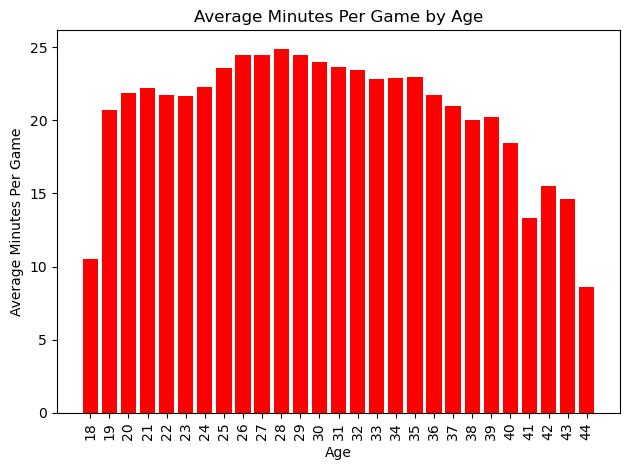

In [14]:
# Create bar graph for Minutes PG
y1 = mean_age_df["minutes per game"]
plt.figure()
plt.bar(x_axis, y1, color='red', alpha=1, align="center")
plt.xticks(tick_locations, mean_age_df["age"], rotation="vertical")
plt.title("Average Minutes Per Game by Age")
plt.xlabel("Age")
plt.ylabel("Average Minutes Per Game")
plt.tight_layout()
plt.show()

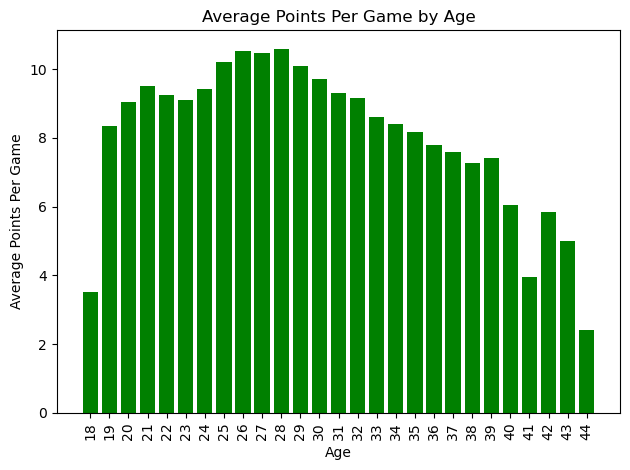

In [15]:
# Create bar graph for PPG
y2 = mean_age_df["points per game"]
plt.figure()
plt.bar(x_axis, y2, color='green', alpha=1, align="center")
plt.xticks(tick_locations, mean_age_df["age"], rotation="vertical")
plt.title("Average Points Per Game by Age")
plt.xlabel("Age")
plt.ylabel("Average Points Per Game")
plt.tight_layout()
plt.show()

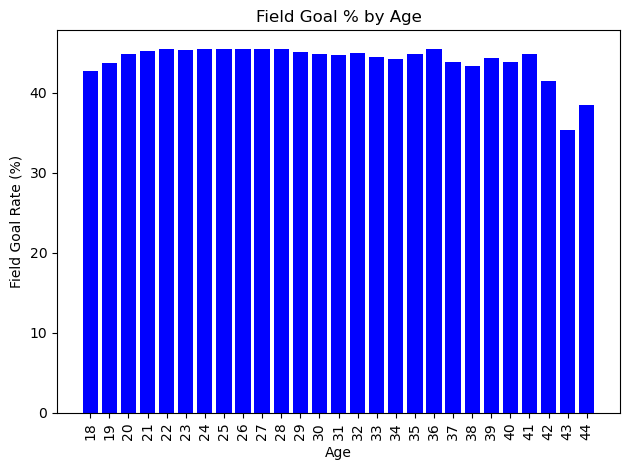

In [10]:
# Create bar graph for Field Goal %
plt.figure()
plt.bar(x_axis, mean_age_df["field goal %"], color='blue', alpha=1, align="center")
plt.xticks(tick_locations, mean_age_df["age"], rotation="vertical")
plt.title("Field Goal % by Age")
plt.xlabel("Age")
plt.ylabel("Field Goal Rate (%)")
plt.tight_layout()
plt.show()

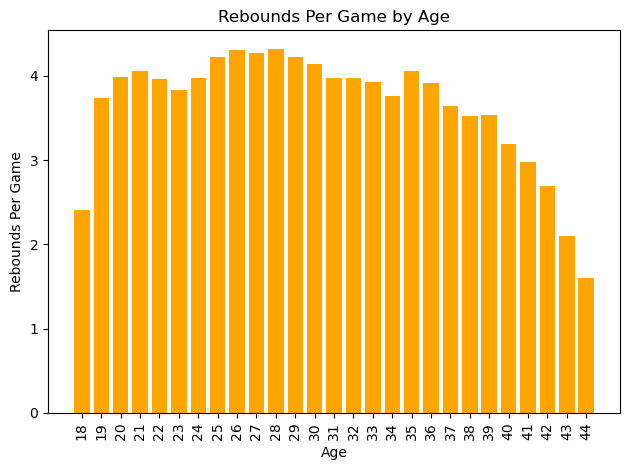

In [16]:
# Create bar graph for Rebounds PG
y3 = mean_age_df["rebounds per game"]
plt.figure()
plt.bar(x_axis, y3, color='orange', alpha=1, align="center")
plt.xticks(tick_locations, mean_age_df["age"], rotation="vertical")
plt.title("Rebounds Per Game by Age")
plt.xlabel("Age")
plt.ylabel("Rebounds Per Game")
plt.tight_layout()
plt.show()

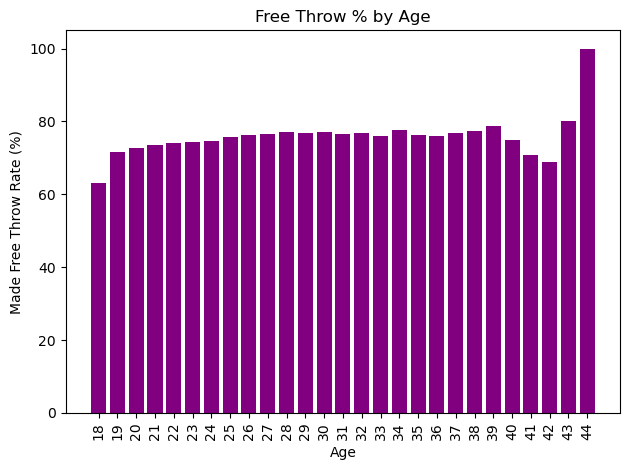

In [12]:
# Create bar graph for Free Throw %
plt.figure()
plt.bar(x_axis, mean_age_df["free throw %"], color='purple', alpha=1, align="center")
plt.xticks(tick_locations, mean_age_df["age"], rotation="vertical")
plt.title("Free Throw % by Age")
plt.xlabel("Age")
plt.ylabel("Made Free Throw Rate (%)")
plt.tight_layout()
plt.show()

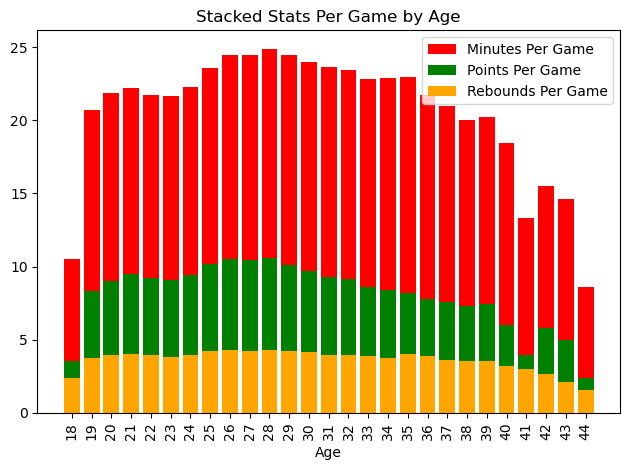

In [19]:
#Create a stacked bar chart overlaying minutes, points, and rebounds
plt.bar(x_axis, y1, color='red', alpha=1, align="center")
plt.bar(x_axis, y2, color='green', alpha=1, align="center")
plt.bar(x_axis, y3, color='orange', alpha=1, align="center")
plt.xticks(tick_locations, mean_age_df["age"], rotation="vertical")
plt.title("Stacked Stats Per Game by Age")
plt.xlabel("Age")
plt.legend(["Minutes Per Game",
            "Points Per Game ",
            "Rebounds Per Game"])
plt.tight_layout()
plt.show()

## Question 1:
### Does age affect performance, as measured by FG%, PPG, minutes played, etc.?

## Question 2:
### Does position impact performance stats as measured by playing time, PPG, etc.?

## Question 3:
### How have average stats per position changed over time?

## Question 4:
### For players that played for more than one team in a single season, did they tend to score better for a certain team (their first, third, etc.)?